# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (25)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**11/03/2024**

# Time Series Analysis

### Series temporales sintéticas

Las series temporales sintéticas (___Synthetic time series___) son datos **creados artificialmente** que se utilizan para **simular** datos del mundo real (_real-world data_), normalmente para realizar pruebas o experimentos. Estos datos de series de tiempo se pueden generar utilizando varias técnicas estadísticas y modelos matemáticos.

- #### Trend-stationary

Un proceso estacionario de tendencia (___trend-stationary___) es un proceso estocástico del que se puede eliminar una tendencia subyacente, dejando un proceso estacionario.  

Estas series temporales muestran una **tendencia estable** a largo plazo con **fluctuaciones a corto plazo** en torno a esa tendencia. Estas variaciones se mantienen de forma similar a lo largo del tiempo, pero son impredecibles y aleatorias (_ruidos_).

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

### **`Ejercicio 25.1`**

Vamos a nalizar los datos de **`Sunspots Dataset`** que son números promediados mensuales de **manchas solares desde 1749 hasta 1983**. Esta serie tempòral se ha recolectado en el _Observatorio Federal Suizo_ (_**Zúrich**_) hasta **1960**, luego en el _Observatorio Astronómico de Japón_ (**_Tokio_**).  

Los números de manchas solares son una *medida de la actividad solar*. Los datos vienen en las unidades originales utilizadas por los observadores de forma bruta y **no hay ajustes** por cambios en la instrumentación o sesgo del observador.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df_spot = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', index_col=False)
df_spot


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [4]:
# Convertir la columna en fechas tipo DatetimeIndex
df_spot['fechas'] = pd.to_datetime(df_spot['Month'], format='%Y-%m')

# Convertir la columna de fechas a los índices del DataFrame
df_spot.set_index('fechas', inplace=True)

# Quitar las columnas que ya no se usan
df_spot.drop(columns='Month', inplace=True)

df_spot

,Sunspots
fechas,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


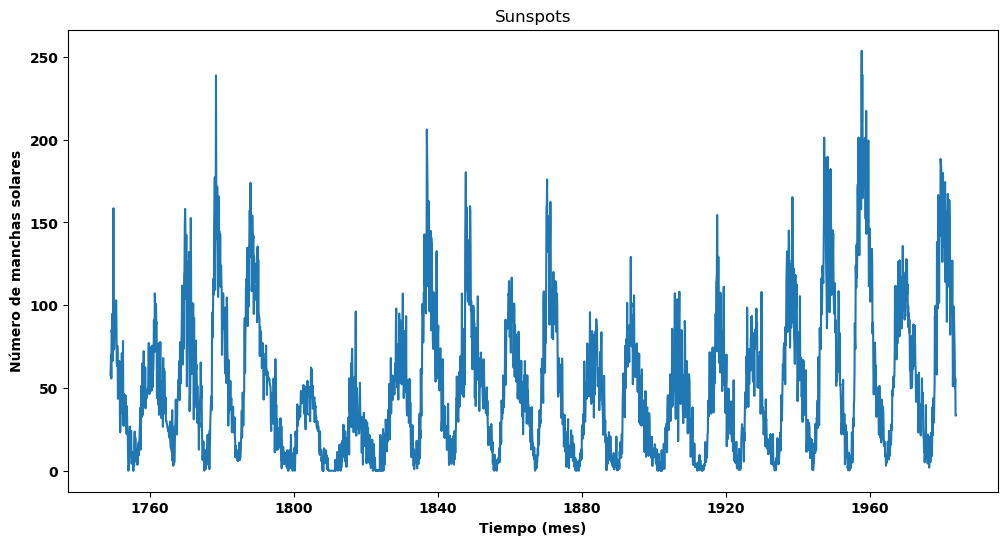

In [5]:
plt.plot(df_spot)
plt.xlabel('Tiempo (mes)')
plt.ylabel('Número de manchas solares')
plt.title('Sunspots')
plt.show()

Se puede observar que los datos de la serie **no tienen una distribución normal** y presentan oscilaciones en sus características estadísticas indicandndo que **la serie temporal no es estacionaria**.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


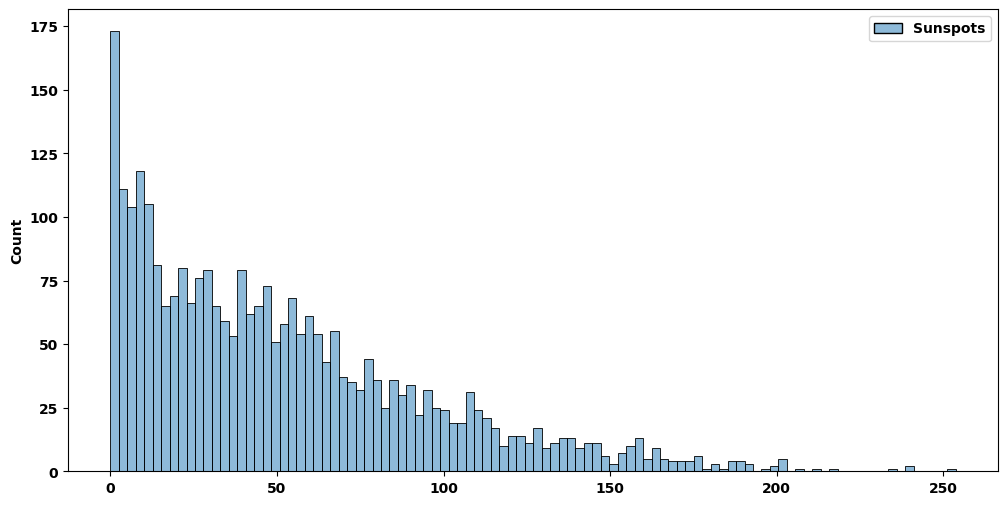

In [6]:
# Visualizamos el histograma de todos los valores de la serie
sns.histplot(data=df_spot, bins=100)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


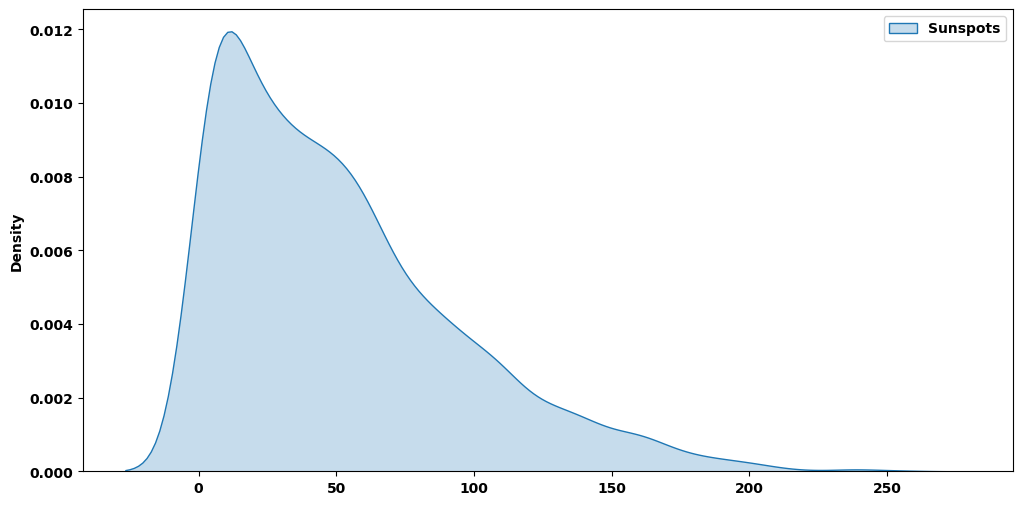

In [7]:
# Visualizamos la distribución de la probabilidad mediante el método "Kernel density estimation (KDE)"
sns.kdeplot(data=df_spot, fill=True)
plt.show()

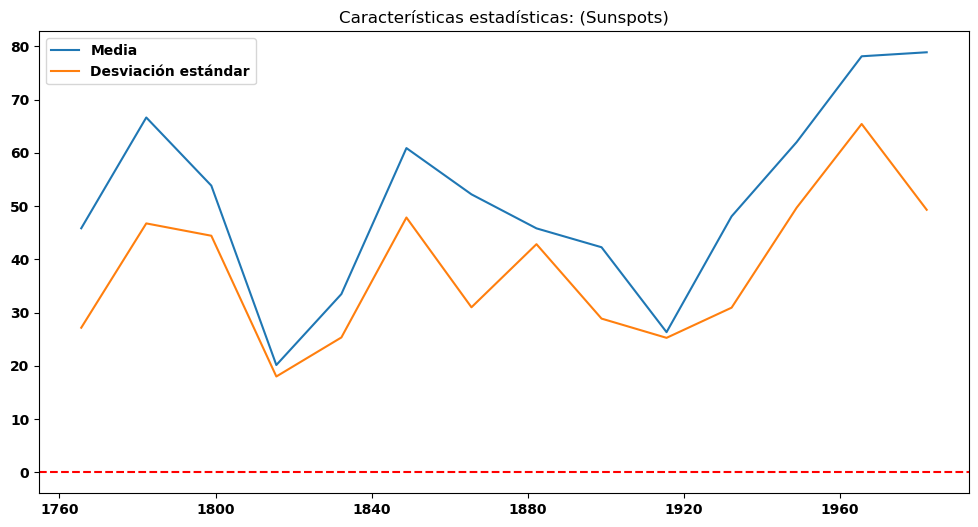

In [8]:
# La gráfica de las "Características estadísticas" y su evolución a lo largo de tiempo
win = 200
df_spot_media = df_spot.rolling(win).mean().iloc[win-1::win]
df_spot_std = df_spot.rolling(win).std().iloc[win-1::win]
plt.plot(df_spot_media, label='Media')
plt.plot(df_spot_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Sunspots)")
plt.legend()
plt.show()

**`25.1.1`** Transforma los datos de la serie temporal mediante la transformada de `Yeo-Johnson` que se aplica de una forma muy similar a la transformación `Box-Cox`. Después, visualiza los datos transformados e imprime el valor de la potencia o el hiperparámetro que se haya aplicado en la transformación (_lambda_).

**`25.1.2`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal transformada**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 200`

**`25.1.3`** Aplica una **diferenciación del primer orden** sobre estos datos transformados anteriormente. Saca la gráfica de la ***la serie temporal transformada y diferenciada***.

**`25.1.4`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal transformada y diferenciada**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos **comparando con los datos de la serie original**: 

 - `win = 200`
 - `plt.ylim(-1,10)`

**`25.1.5`** Saca la gráfica de ***Autocorrelación (correlograma)*** para **la serie temporal transformada y diferenciada**, considerando hasta el retraso indicado y analiza lo que ves presente en esta gráfica **comparando con los datos de la serie original**: 

 - `lags=30` 

**`25.1.6`** Saca la gráfica de ***histograma*** y también la ditribución de la probabilidad usando la gráfica de ***densidad de kernel (KDE)*** para **la serie temporal transformada y diferenciada**, y analiza lo que ves presente en estas gráficas **comparando con los datos de la serie original**:
 
 - para _histplot_: `bins=100`
 - para _kdeplot_: `fill=True`
  

---

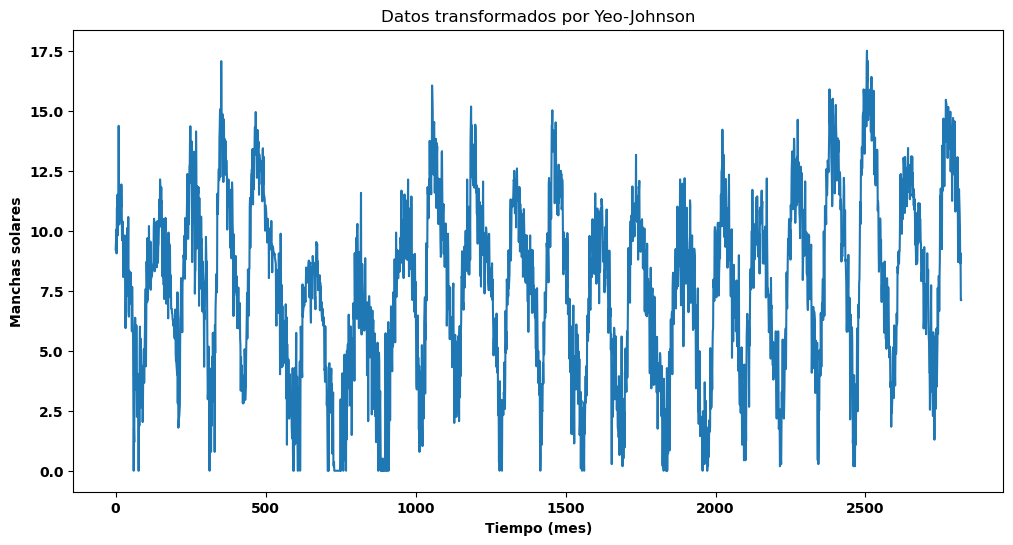

0.35827220693878836


In [9]:
## Solución 25.1.1
from scipy.stats import yeojohnson

data_spot_yj, lambda_spot = yeojohnson(df_spot.values.reshape(-1))

plt.plot(data_spot_yj)
plt.title("Datos transformados por Yeo-Johnson")
plt.xlabel("Tiempo (mes)")
plt.ylabel("Manchas solares")
plt.show()

print(lambda_spot)


In [10]:
## Solución 25.1.2
win_spot = 200
df_spot_yj = pd.DataFrame(data_spot_yj)

df_spot_yj_media = df_spot_yj.rolling(win_spot).mean().iloc[win-1::win]
df_spot_yj_std = df_spot_yj.rolling(win_spot).std().iloc[win-1::win]


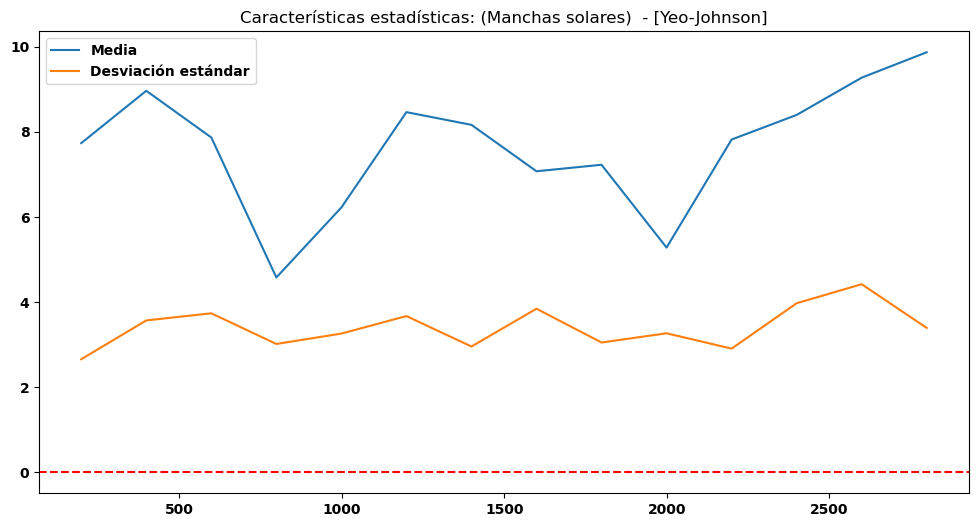

In [11]:
plt.plot(df_spot_yj_media, label='Media')
plt.plot(df_spot_yj_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Manchas solares)  - [Yeo-Johnson]")
plt.legend()
plt.show()


> #### Explicación 25.1.2
> En comparación a la gráfica de los datos originales, podemos ver una diferencia aparente. Existen medidas más estabilizadas en comparación al dataframe original, pero aún podemos ver una gráfica para la media que varía mucho (sigue siendo inestable). Estas características muestran aun patrones que debemos eliminar.  

In [12]:
## Solución 25.1.3
df_spot_yj_diff = df_spot_yj.diff().dropna()

df_spot_yj_diff


,0
1,0.327946
2,0.497021
3,-0.995119
4,1.908810
5,-0.086520
...,...
2815,-0.635570
2816,-1.528631
2817,0.425184
2818,-1.961787


c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

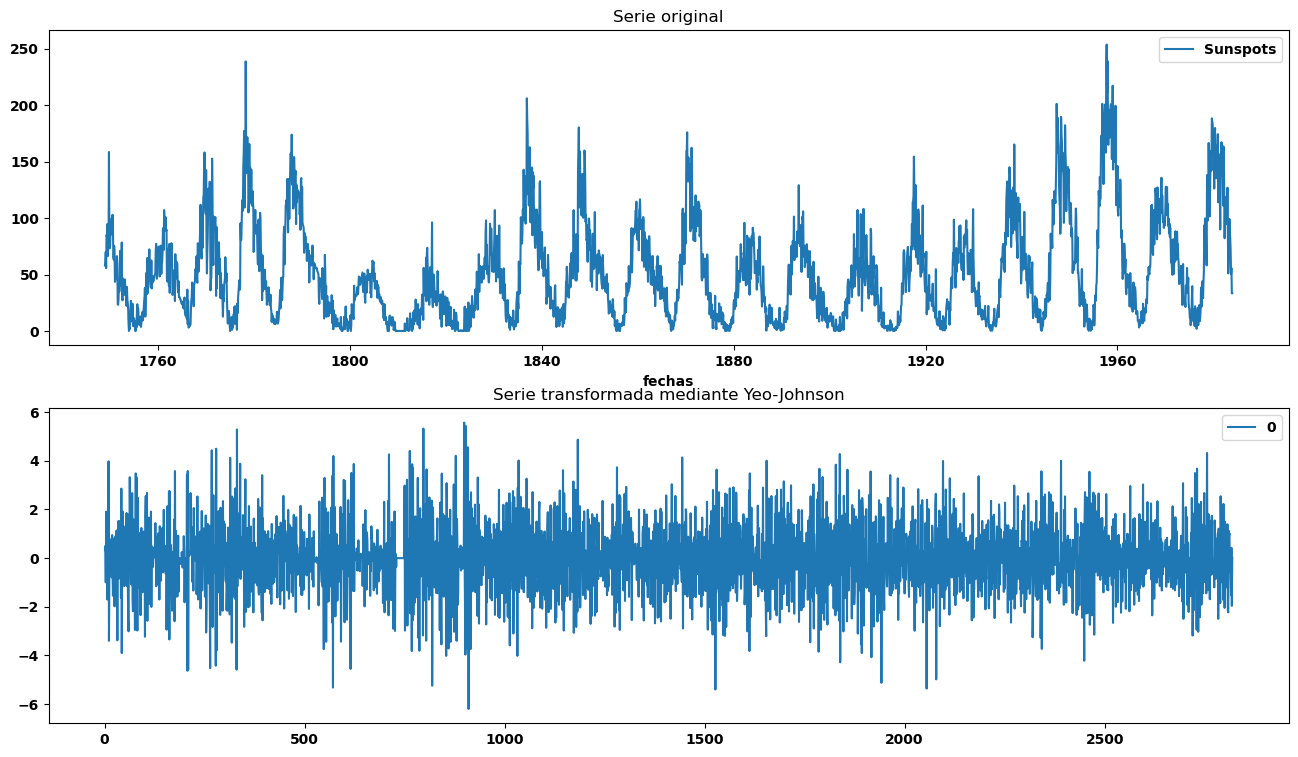

In [13]:
fig, axes = plt.subplots(2,1, figsize=(16,9))
sns.lineplot(data=df_spot, ax=axes[0])
axes[0].set_title('Serie original')
sns.lineplot(data=df_spot_yj_diff, ax=axes[1])
axes[1].set_title('Serie transformada mediante Yeo-Johnson')
plt.show()


In [14]:
## Solución 25.1.4
df_spot_yj_media_diff = df_spot_yj_diff.rolling(win_spot).mean().iloc[win-1::win]
df_spot_yj_std_diff = df_spot_yj_diff.rolling(win_spot).std().iloc[win-1::win]


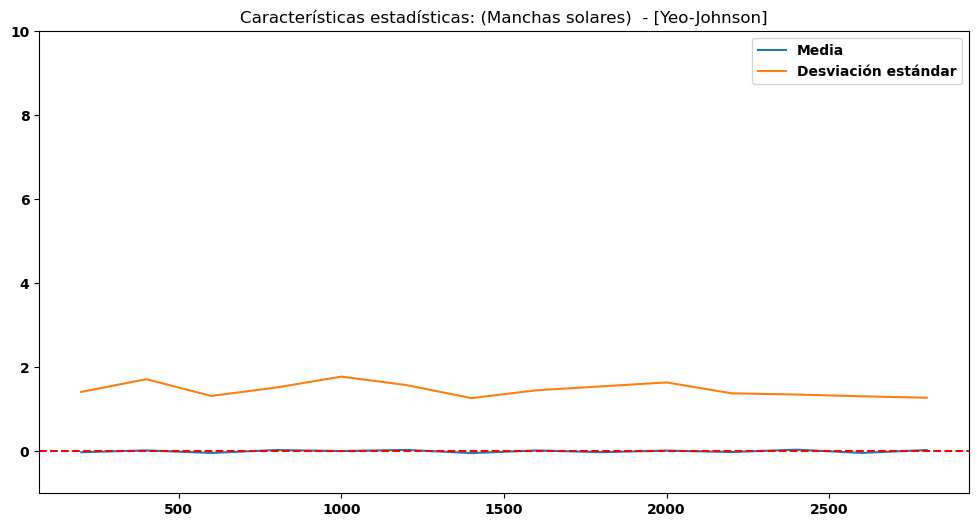

In [15]:
plt.plot(df_spot_yj_media_diff, label='Media')
plt.plot(df_spot_yj_std_diff, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: (Manchas solares)  - [Yeo-Johnson]")
plt.legend()
plt.ylim(-1,10)
plt.show()


> #### Explicación 25.1.4
> En esta nueva gráfica para la diferenciación, podemos ver unas variables mucho más estables, con una media que es casi perfecta y que roza el 0 muy de cerca. La desviación aún tiene algunos picos no muy grandes que, en comparación a la media, siguen mostrando cierta inestabilidad, ya que asumimos que no es un ruido blanco perfecto.

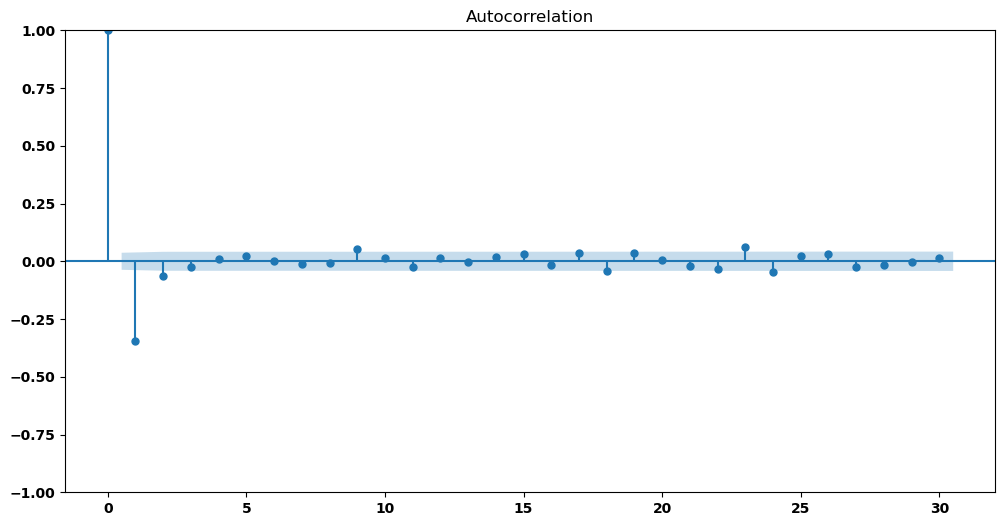

In [16]:
## Solución 25.1.5
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_spot_yj_diff, lags=30)
plt.show()


> #### Explicación 25.1.5
> En esta gráfica podemos observar que practicamente todos los valores se encuentran dentro de la zona de confianza, en comparación a la gráfica de autocorrelación con los datos originales, los valores fuera de dicha zona eran muchos más, oscilando ahora en valores muy cercanos al 0.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


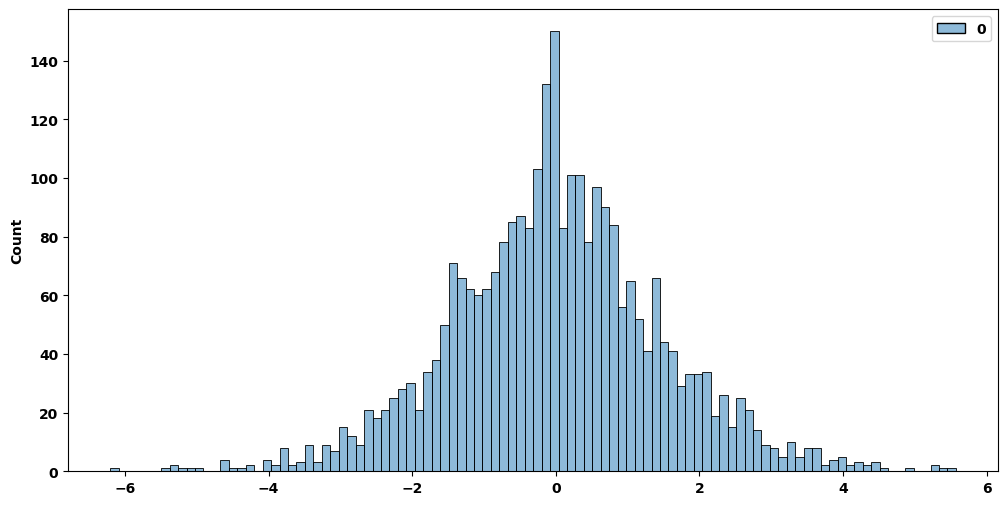

In [17]:
## Solución 25.1.6
sns.histplot(data=df_spot_yj_diff, bins=100, kde=False)
plt.show()


c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


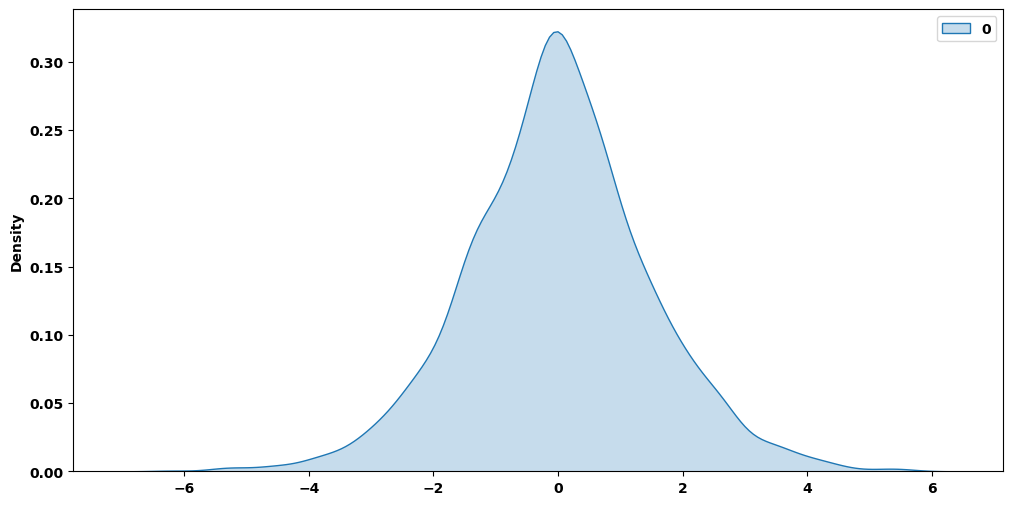

In [18]:
sns.kdeplot(data=df_spot_yj_diff, fill=True)
plt.show()


> #### Explicación 25.1.6
> Podemos observar en estas gráficas de distribución que los valores que se encuentran cerca del 0 son predominantes, habiendo ahora mucho menos valores alejados y con una campanana que, aunque no es perfecta, tiene una tendencia y una forma que se acerca a la distribución deseada. En la gráfica de valores reales podíamos ver que la forma era mucho más decadente a valores más altos, mientras que ahora tienda a valores más céntricos.